        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.1047

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


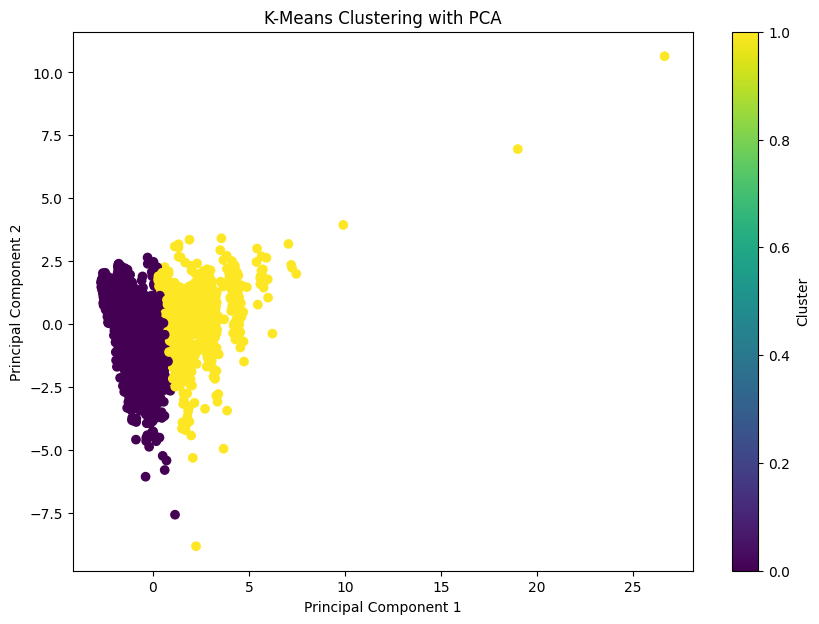

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = 'credit_dataset.csv'
df = pd.read_csv(file_path)

print(df.head())

df.drop(columns=['Work_phone', 'Phone', 'Email'], inplace=True)


#number of unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}
print("Unique values in each categorical column:", unique_values)

unique_values_names = {col: df[col].unique() for col in categorical_columns}

for col, values in unique_values_names.items():
    print(f"Unique values in '{col}': {values}")

df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded = df_encoded.astype(int)

columns_to_normalize = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

scaler = StandardScaler()
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

print(df_encoded.head())

processed_file_path = 'processed_credit_dataset.csv'
df_encoded.to_csv(processed_file_path, index=False)
print(f"Processed file saved to: {processed_file_path}")

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded.drop(columns=['ID', 'Target']))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded.drop(columns=['ID', 'Target', 'Cluster']))

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster target distribution (count):
         Count (Target=0)  Count (Target=1)
Cluster                                    
0                    6161               917
1                    2265               366

Cluster target distribution (percentage):
        Percentage (Target=0) Percentage (Target=1)
Cluster                                            
0                      87.04%                12.96%
1                      86.09%                13.91%


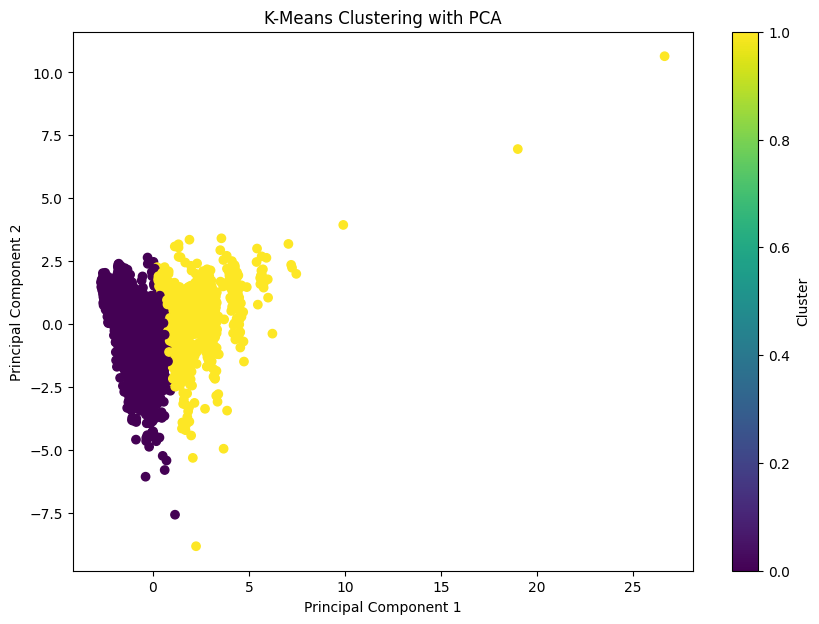

In [15]:
# Perform K-Means clustering with 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded.drop(columns=['ID','Target']))

# Calculate the percentage of each target value within each cluster
cluster_target_distribution = df_encoded.groupby(['Cluster', 'Target']).size().unstack().fillna(0)
cluster_target_percentage = cluster_target_distribution.div(cluster_target_distribution.sum(axis=1), axis=0) * 100

# Format the output
cluster_target_distribution.columns = ['Count (Target=0)', 'Count (Target=1)']
cluster_target_percentage.columns = ['Percentage (Target=0)', 'Percentage (Target=1)']
cluster_target_percentage = cluster_target_percentage.applymap(lambda x: f"{x:.2f}%")

print("Cluster target distribution (count):")
print(cluster_target_distribution)
print("\nCluster target distribution (percentage):")
print(cluster_target_percentage)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded.drop(columns=['ID','Target', 'Cluster']))

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster target distribution (count):
         Count (Target=0)  Count (Target=1)
Cluster                                    
0                    2272               367
1                    6154               916

Cluster target distribution (percentage):
        Percentage (Target=0) Percentage (Target=1)
Cluster                                            
0                      86.09%                13.91%
1                      87.04%                12.96%
Purity: 0.8679
Entropy: 0.5632


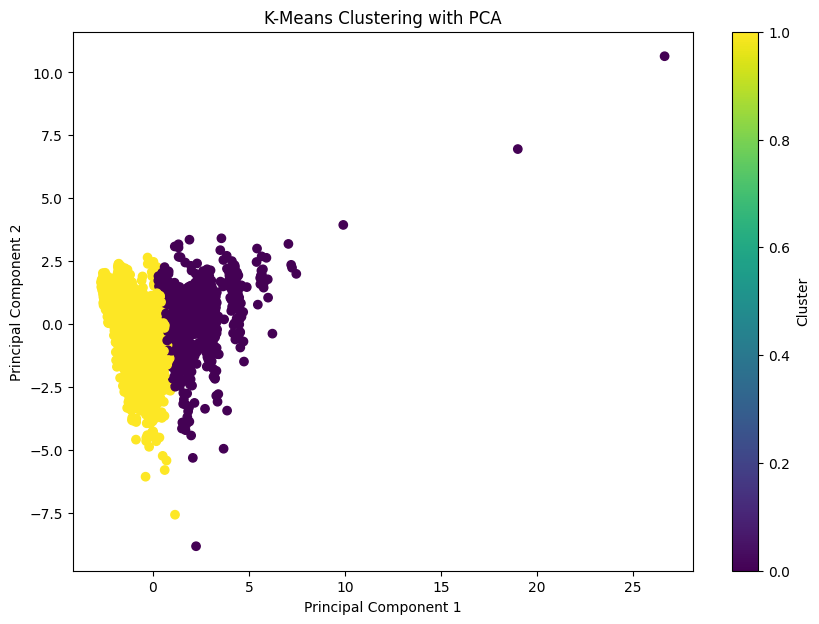

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'credit_dataset.csv'
df = pd.read_csv(file_path)

# Drop less meaningful columns
df.drop(columns=['Work_phone', 'Phone', 'Email'], inplace=True)

# One-hot encode the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded = df_encoded.astype(int)

# Columns to be normalized using z-score
columns_to_normalize = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
scaler = StandardScaler()
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

# Perform K-Means clustering with 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded.drop(columns=['ID', 'Target']))

# Calculate the percentage of each target value within each cluster
cluster_target_distribution = df_encoded.groupby(['Cluster', 'Target']).size().unstack().fillna(0)
cluster_target_percentage = cluster_target_distribution.div(cluster_target_distribution.sum(axis=1), axis=0) * 100

# Format the output
cluster_target_distribution.columns = ['Count (Target=0)', 'Count (Target=1)']
cluster_target_percentage.columns = ['Percentage (Target=0)', 'Percentage (Target=1)']
cluster_target_percentage = cluster_target_percentage.applymap(lambda x: f"{x:.2f}%")

print("Cluster target distribution (count):")
print(cluster_target_distribution)
print("\nCluster target distribution (percentage):")
print(cluster_target_percentage)

# Calculate purity
total_samples = df_encoded.shape[0]
max_cluster_counts = cluster_target_distribution.max(axis=1)
purity = max_cluster_counts.sum() / total_samples

print(f"Purity: {purity:.4f}")

# Calculate entropy
def cluster_entropy(cluster):
    cluster_sum = cluster.sum()
    if cluster_sum == 0:
        return 0
    probabilities = cluster / cluster_sum
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Adding a small value to avoid log(0)
    return entropy

entropy_values = cluster_target_distribution.apply(cluster_entropy, axis=1)
weighted_entropy = (entropy_values * cluster_target_distribution.sum(axis=1) / total_samples).sum()

print(f"Entropy: {weighted_entropy:.4f}")

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded.drop(columns=['ID', 'Target', 'Cluster']))

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
